Gradient descent is an optimization algorithm used to find the local minimum of a function. It is commonly used in many different machine learning algorithms. In this blog post, I will explain the principles behind gradient descent using Python, starting with a simple example of how gradient descent can be used to find the local minimum of a quadratic equation, and then progressing to applying gradient descent to linear regression. By the end of the post, you should be able to code your own version of gradient descent and understand the concept behind it.

# Minimizing a quadratic equation
To start, let's suppose we have a simple quadratic function, f(x)=x2−6x+5f(x)=x2−6x+5, and we want to find the minimum of this function. There are plenty of possible reasons why you would want to find the minimum: For example, an object (like a hot air balloon) might be falling down a certain amount of time, before rising again. You want to find out the lowest height of the balloon to make sure you don't accidentally crash into the ground. We can solve this analytically using calculus, by finding the derivate and setting it to zero:


In [ ]:
f′(x)=2x−62x−6=02x=6x=3(1)(2)(3)(4)
(1)f′(x)=2x−6(2)2x−6=0(3)2x=6(4)x=3
By simply plotting the function, we can see that the local minimum is indeed at 3:

In [26]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
from bokeh.plotting import figure, output_file, show
import bokeh.plotting as bp
from bokeh.models import  WheelZoomTool, ResetTool, PanTool
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats 

x = np.linspace(-15, 21, 100)
y = x ** 2 - 6 * x + 5

#plot line
plot = figure(width=300, height=300)
plot.line(x, y, color="#7FC97F")
plot.circle(3, -4, size =10, color="orange")
#show(plot)

W = 590
H = 350
bp.output_notebook()
%matplotlib inline
TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]
s1 = bp.figure(width=W, plot_height=H, 
               title='Local minimum of function',  
               tools=TOOLS)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.circle(3, -4, size =10, color="orange")
s1.title.text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"
bp.show(s1)
#

Loading BokehJS ...

We can also find the local minimum with gradient descent - it's an iterative function using the steepest descent. To find the local minimum, you start at a random point, and move into the direction of steepest descent relative to the gradient, i.e. into the direction that goes down (hence, descent). In this example, let's suppose we start at x=15x=15. The gradient at this point is 2×15−6=242×15−6=24. Because we're using gradient descent, we need to subtract the gradient from our xx-coordinate. However, notice that 16−2516−25 gives us −9−9, clearly overshooting over target of −3−3. To fix this, we multiply the gradient by a step size. This step size (often called alpha) has to be chosen carefully, as a value too small will result in a long computation time, while a value too large will not give you the right result (by overshooting) or even fail to converge. In this example, we'll set the step size to 0.01, which means we'll subtract 24×0.0124×0.01 from 15, which is 14.7614.76. This is now our new temporary local minimum: We continue this method until we either don't see a change after we subtracted the gradient * step size, or until we've completed a pre-set number of iterations.

Below, I've coded this algorithm in Python. The algorithm stops when the values between the new and the temporary minimum do not differ by more than 0.001 - if we need more precision, we can decrease this value. According to gradient descent, the local minimum occurs at 3.053.05, which is not too far off from the true local minimum.

In [13]:
old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.001


def f_derivative(x):
    return 2 * x - 6


mins = []
cost = []

while abs(temp_min - old_min) > precision: # 新旧最小值之间的差 < 精度 ,证明这个值在最小值之间徘徊
    old_min = temp_min
    gradient = f_derivative(old_min)
    move = gradient * step_size # 斜率 * 步长 = 下降距离
    temp_min = old_min - move # 新的最小值 = 旧最小值 - 下降距离
    cost.append((3 - temp_min) ** 2)
    mins.append(temp_min)

print("Local minimum occurs at {}.".format(round(temp_min, 2)))
#print(mins)
#print(cost)

Local minimum occurs at 3.05.


We can visualize the gradient descent by plotting all temporary local minima on the curve. As you can see, the improvement decreases over time; at the end, the local minimum barely improves.

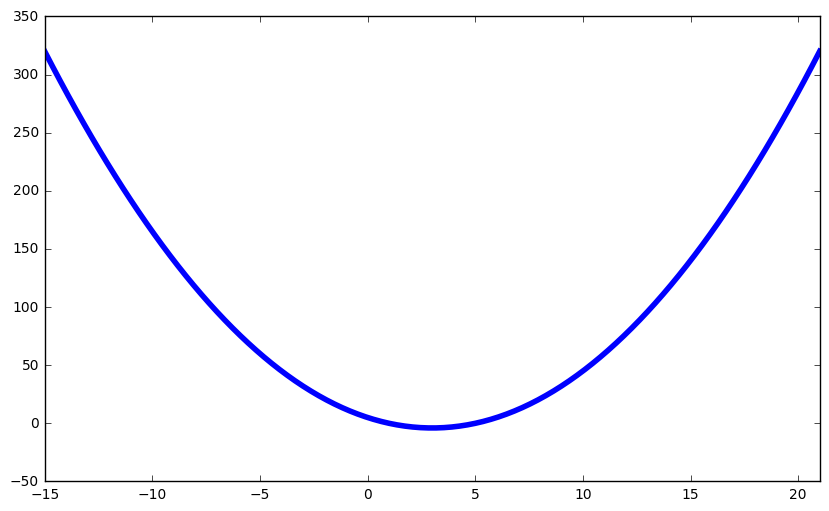

In [19]:
# <!-- collapse=True -->

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x,y, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)

Another important visualization of gradient descent is that there should be a visible improvement over time: In this example, I simply plotted the squared distance from the local minima calculated by gradient descent and the true local minimum against the iteration during which it was calculated. As we can see, the distance gets smaller over time, but barely changes in later iterations. This measure of distance is often called the cost or loss, but the implementation differs depending on what function you're trying to minimize.

In [21]:
# <!-- collapse=True -->


TOOLS = [WheelZoomTool(), ResetTool(), PanTool()]


x, y = (zip(*enumerate(cost)))
s1 = bp.figure(width=W, 
               height=H, 
               title='Squared distance to true local minimum',  
#                title_text_font_size='14pt', 
               tools=TOOLS,
               x_axis_label = 'Iteration',
               y_axis_label = 'Distance'
)
s1.line(x, y, color="navy", alpha=0.5, line_width=3)
s1.title.text_font_size = '16pt'
s1.yaxis.axis_label_text_font_size = "14pt"
s1.xaxis.axis_label_text_font_size = "14pt"


bp.show(s1)

# Linear regression

Hopefully, the previous section gave you the basic understanding of gradient descent. In this section, we'll apply the same concept to linear regression in order to find line coefficients that fit the data well.

Let's make up some data with noise and plot the resulting data. In this example, it doesn't really matter what the data represent - it could be any two variables that are related to each other, like the height and weight of a person. Additionally, I calculated the line of best fit through the least squares implementation in the scipy package, in order to compare the results from gradient descent to the line of best fit. As in our first example, we will use this solution to test how well gradient descent performs.

In [27]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=10,
                       random_state=2015)


slope, intercept, _,_,_ = stats.linregress(x[:,0],y)
best_fit = x[:,0] * slope + intercept

In [32]:
# <!-- collapse=True -->
source = bp.ColumnDataSource(
        data=dict(
            x=x.flatten(),
            y=y        )
    )


TOOLS = [ WheelZoomTool(), ResetTool(), PanTool()]

fig = bp.figure(width=W, height=H, 
                title='Linear Regression Data',  
        
                tools=TOOLS )
s1 = fig.circle('x', 'y', size=10, color='navy', alpha=0.5, source=source)
s2 = fig.line(x.flatten(), best_fit, color='orange', line_width=3)

fig.title.text_font_size = '16pt'
fig.yaxis.axis_label_text_font_size = "14pt"
fig.xaxis.axis_label_text_font_size = "14pt"

bp.show(fig)